
Applying Data Transformation

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

display(X_train.shape)

(426, 30)

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [4]:
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
 X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
 X_train_scaled.max(axis=0)))


transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


Scaling Training and test data the same way

The Effect of Preprocessing on Supervised Learning


In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC(C=100)
svc.fit(X_train, y_train)
print(svc.score(X_test, y_test))

0.9440559440559441


In [6]:
svm2 = SVC(C=100)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm2.fit(X_train_scaled, y_train)
print(svm2.score(X_test_scaled, y_test))


0.965034965034965


Dimensionality Reduction, Feature Extraction, and
Manifold Learning

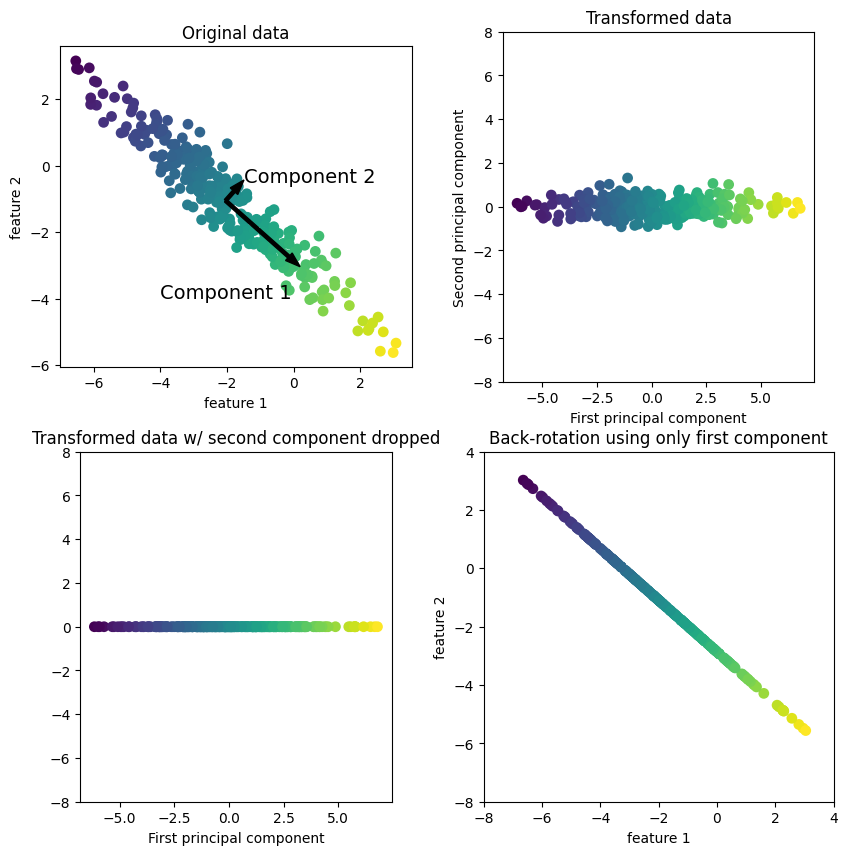

In [7]:
import mglearn
mglearn.plots.plot_pca_illustration()

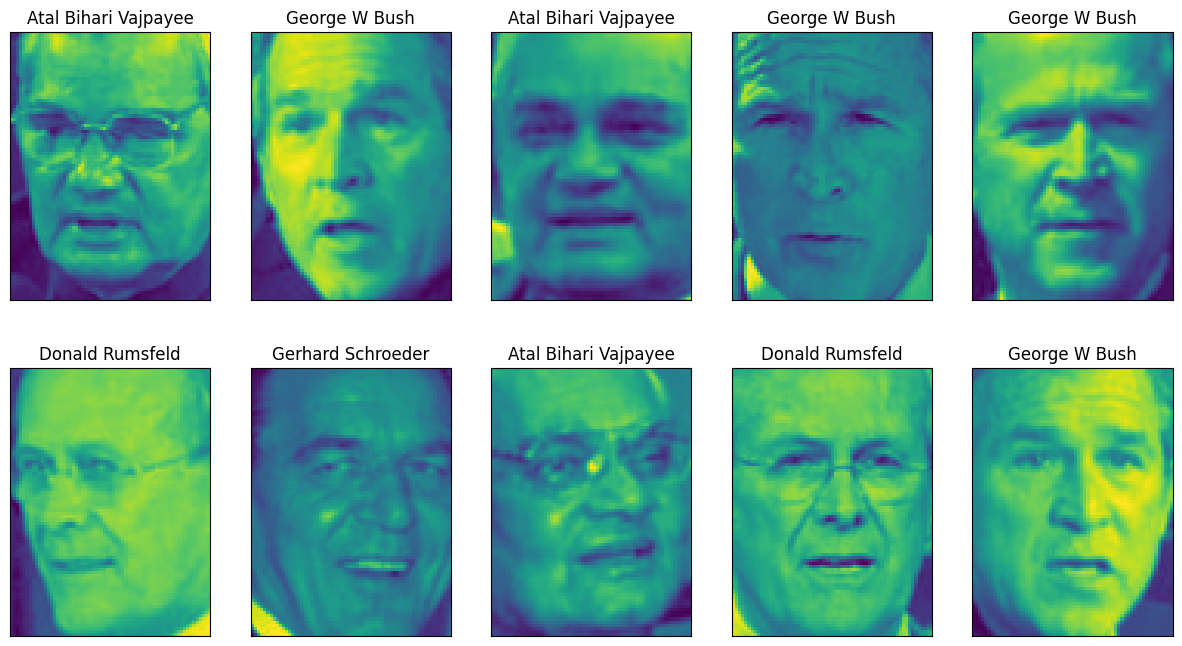

In [8]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
 ax.imshow(image)
 ax.set_title(people.target_names[target])


In [9]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
display(people.images.shape)

(1097, 87, 65)

Manifold Learning with t-SNE

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

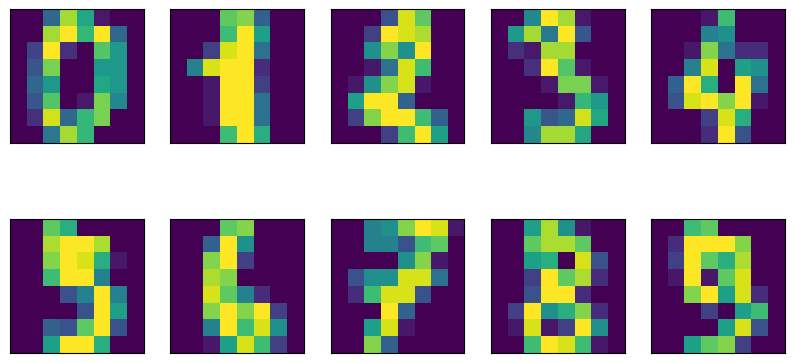

In [10]:
from sklearn.datasets import load_digits

digits = load_digits()

display(digits.data)

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
    subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)


Text(0, 0.5, 'Second principal component')

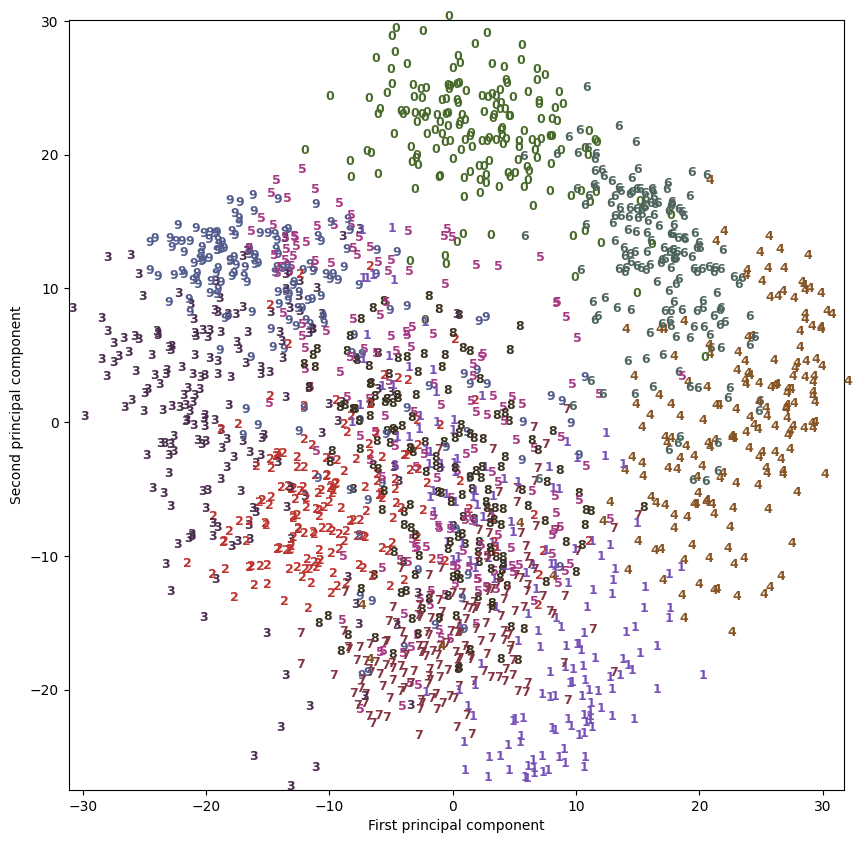

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
 "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
 # actually plot the digits as text instead of using scatter
 plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
 color = colors[digits.target[i]],
 fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0.5, 0, 't-SNE feature 1')

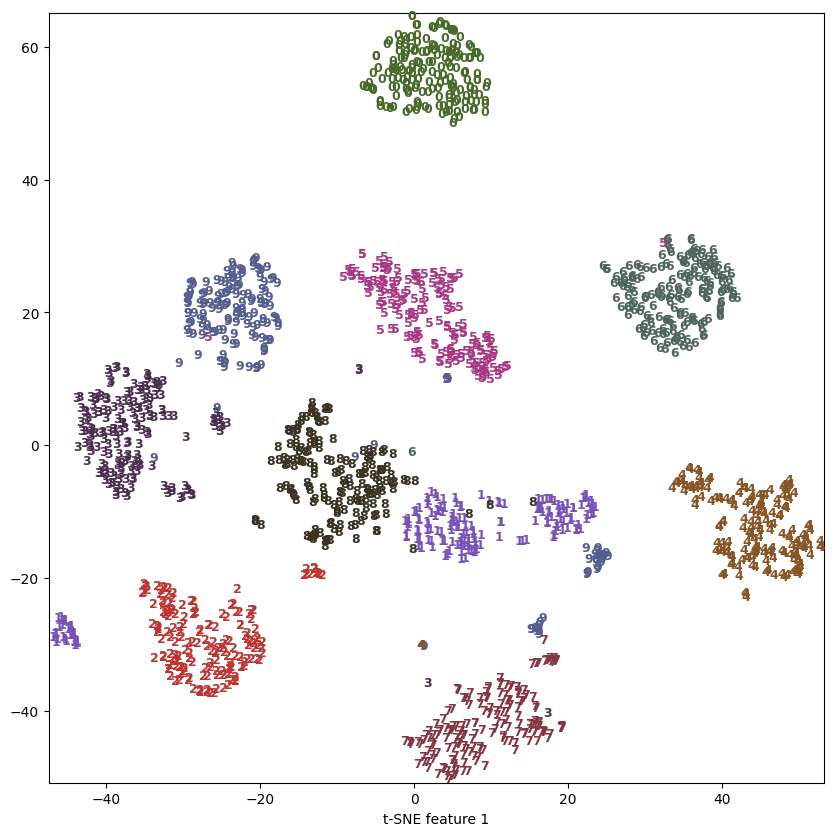

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE()
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
 # actually plot the digits as text instead of using scatter
 plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
 color = colors[digits.target[i]],
 fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")


Clustering

K-Means Clustering

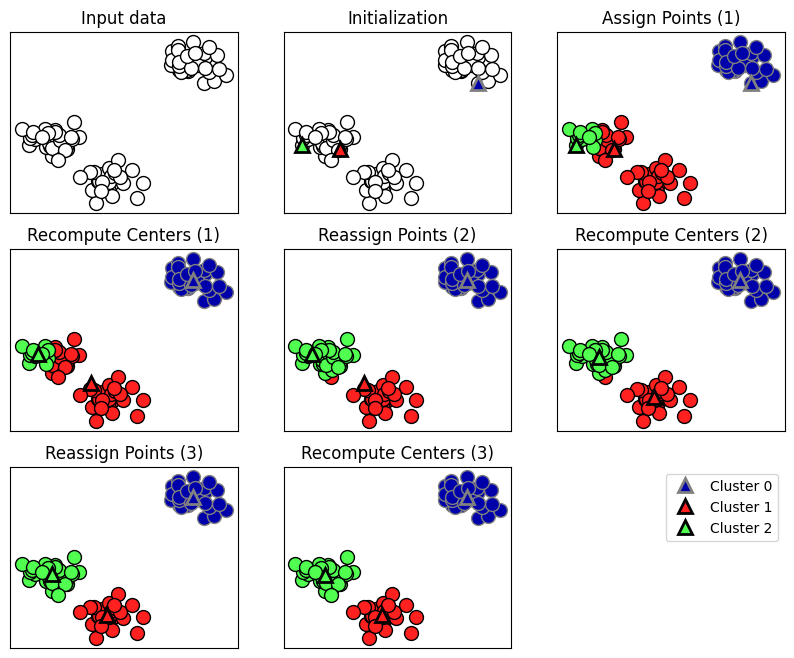

In [13]:
mglearn.plots.plot_kmeans_algorithm()

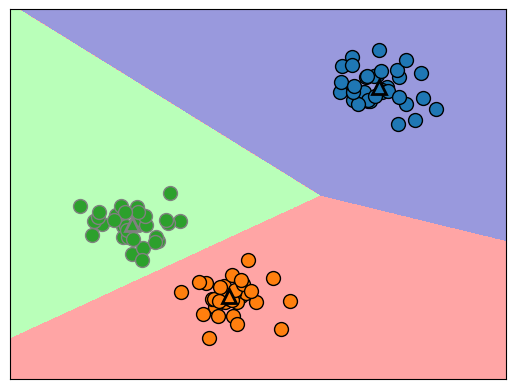

In [14]:
mglearn.plots.plot_kmeans_boundaries()

In [15]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)
kMeans = KMeans(n_clusters=3)
kMeans.fit(X)

KMeans(n_clusters=3)

In [16]:
print(f"Cluster member ship:\n{kMeans.labels_}")

Cluster member ship:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


Vector quantization, or seeing k-means as decomposition